## Conexão com o banco de dados e import de bibliotecas

In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 

In [2]:
conn = psycopg2.connect(host="localhost",database="Qr-Bus", user="postgres", password="bd2018")


## Relatorio 1

### - Objetivo: Relatório que informe ao usuário seu histórico de viagens, com dias e horários em que usou o sistema, assim como as linhas utilizadas.

 codigo para obtenção do resultado:


In [3]:
usuario_id ='3'
relatorio_historico = pd.read_sql_query("""
                select data, hora, numero_linha from passagem 
                inner join usuario 
                on (usuario.id_usuario = """+usuario_id+");",conn)

In [4]:
relatorio_historico

,data,hora,numero_linha
0,2018-10-08,07:30:00,815
1,2018-10-08,12:00:00,815
2,2018-10-09,07:30:00,815
3,2018-10-09,12:00:00,815
4,2018-10-10,07:30:00,815
5,2018-10-10,12:00:00,815
6,2018-10-11,07:30:00,815
7,2018-10-11,12:00:00,815
8,2018-10-12,07:30:00,815
9,2018-10-12,12:00:00,815


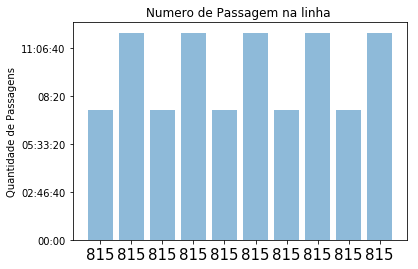

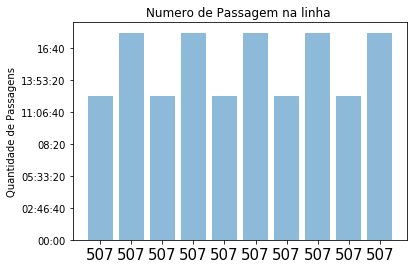

In [46]:

df = pd.DataFrame(relatorio_historico)

numeros_agrupados = []
objects = list(df.numero_linha)
for i in objects:
     if i not in numeros_agrupados:
            numeros_agrupados.append(i)


for num in numeros_agrupados:
    objects = list(df.numero_linha)
    performance = list(df.hora)
    new_objects = []
    new_hora=[]
    for i in range(len(objects)):
        if objects[i] == num:
            new_objects.append(objects[i])
            new_hora.append(performance[i])

    objects = tuple(new_objects)
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, new_hora, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.rcParams['xtick.labelsize'] = 15
    plt.ylabel('Quantidade de Passagens')
    plt.title('Numero de Passagem na linha ')

    plt.show()



## Relatorio 2

### - Objetivo: Relatório que informe as linhas mais utilizadas e as menos utilizadas (por todos os usuários) dependendo do horário.

 codigo para obtenção do resultado:


In [6]:
relatorio_linhas_utilizacao = pd.read_sql_query("""
                select numero_linha,count(id_passagem) as qtd_passagens,hora 
                as numero_de_passagens 
                from passagem 
                GROUP by numero_linha, hora;""",conn)

In [7]:
relatorio_linhas_utilizacao

,numero_linha,qtd_passagens,numero_de_passagens
0,815,5,12:00:00
1,507,5,18:00:00
2,507,5,12:30:00
3,815,5,07:30:00


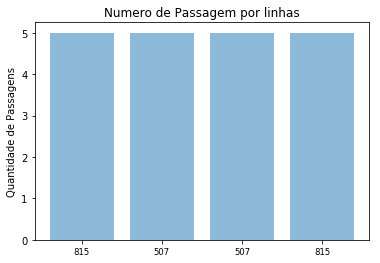

In [8]:

df = pd.DataFrame(relatorio_linhas_utilizacao)
objects = tuple(df.numero_linha)
y_pos = np.arange(len(objects))
performance = list(df.qtd_passagens)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade de Passagens')
plt.title('Numero de Passagem por linhas')
 
plt.show()

## Relatorio 3

### - Objetivo: Relatorio direcionado ao usuário contendo as opções de linhas para sair de sua origem

 codigo para obtenção do resultado:


In [9]:
relatorio_linhas = pd.read_sql_query("""
                select usuario.nome,itinerario.numero_linha from ponto 
                inner join usuario on (ponto.id_logradouro = usuario.id_logradouro) 
                inner join itinerario_ponto on (ponto.id_ponto = itinerario_ponto.id_ponto)
                inner join itinerario on (itinerario.id_itinerario= itinerario_ponto.id_itinerario)
                group by (usuario.nome,itinerario.numero_linha)""",conn)

In [10]:
relatorio_linhas

,nome,numero_linha
0,Ingrid Brum,507
1,Ingrid Brum,501


## Relatorio 4

### - Objetivo: Relatório de linhas que passam por um determinado logradouro

 codigo para obtenção do resultado:


In [11]:
relatorio_linhas = pd.read_sql_query("""
                select itinerario.numero_linha from ponto 
                inner join itinerario_ponto on (ponto.id_ponto = itinerario_ponto.id_ponto)
                inner join itinerario on (itinerario_ponto.id_itinerario = itinerario.id_itinerario )
                inner join logradouro on (ponto.id_logradouro = logradouro.id_logradouro)
                where(logradouro.desc_logradouro = 'Nossa Senhora Da Penha')
                group by (itinerario.numero_linha) """,conn)

In [12]:
relatorio_linhas

,numero_linha
0,501
1,507


## Relatorio 5

### - Objetivo: Relatório direcionado ao usuário para controle de seu saldo, com quantidade de viagens feitas por dia/semana/mês, valor de cada viagem e gasto total no período definido.

 codigo para obtenção do resultado:


In [13]:
relatorio_passagem_porAno = pd.read_sql_query("""
                select date_part('year',passagem.data) as data_ano,
                sum(valor) as soma_passagens from passagem
                group by(data_ano)""",conn)

In [14]:
relatorio_passagem_porMes = pd.read_sql_query("""
               select date_part('month',passagem.data) as data_mes,
               sum(valor) as soma_passagens from passagem
               group by(data_mes)""",conn)

In [15]:
relatorio_passagem_porDia = pd.read_sql_query("""
                select date_part('day',passagem.data) as data_dia,
                sum(valor) as soma_passagens from passagem
                group by(data_dia)""",conn)

In [16]:
relatorio_passagem_porAno


,data_ano,soma_passagens
0,2018.0,"R$ 68,00"


In [17]:
relatorio_passagem_porMes

,data_mes,soma_passagens
0,10.0,"R$ 68,00"


In [18]:
relatorio_passagem_porDia

,data_dia,soma_passagens
0,16.0,"R$ 6,80"
1,8.0,"R$ 6,80"
2,18.0,"R$ 6,80"
3,12.0,"R$ 6,80"
4,10.0,"R$ 6,80"
5,11.0,"R$ 6,80"
6,15.0,"R$ 6,80"
7,9.0,"R$ 6,80"
8,17.0,"R$ 6,80"
9,19.0,"R$ 6,80"


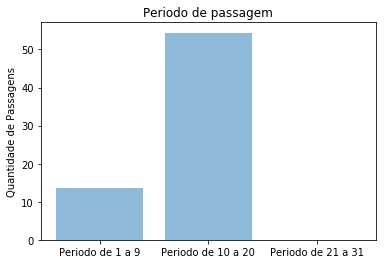

In [59]:

df = pd.DataFrame(relatorio_passagem_porDia)
inicio_mes = []
meio_mes = []
fim_mes = []
meses_agrupados = []
objects = list(df.data_dia)
for i in objects:
    if i >= 1 and i <= 9:
        inicio_mes.append(i)
    elif i >= 10 and i <=20:
        meio_mes.append(i)
    elif i > 21 and i <= 31 :
        fim_mes.append(i)

meses_agrupados.append((inicio_mes,"Periodo de 1 a 9"))  
meses_agrupados.append((meio_mes,"Periodo de 10 a 20"))  
meses_agrupados.append((fim_mes,"Periodo de 21 a 31"))

performance = []
letra = []
for mes in meses_agrupados:
    soma = len(mes[0])*6.80
    performance.append(soma)
    letra.append(mes[1])
objects = tuple(letra)
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.rcParams['xtick.labelsize'] = 10
plt.ylabel('Quantidade de Passagens')
plt.title('Periodo de utilização')

plt.show()


## Relatorio 6

### - Objetivo: Relatório direcionado ao usuário para controle de seu saldo no momento.

 codigo para obtenção do resultado:


In [70]:
relatorio_passagem_atual = pd.read_sql_query("""
    select nome ,sum(pagamento.valor_pagamento) as totalCartao , sum(passagem.valor) as soma_passagem, 
    (sum(pagamento.valor_pagamento) - Cast(sum(passagem.valor) as decimal(6,0))) as Saldo from
    usuario inner join pagamento on (pagamento.id_usuario = usuario.id_usuario)
    inner join passagem on (passagem.id_usuario = usuario.id_usuario)
    group by  pagamento.valor_pagamento,nome
""",conn)

In [71]:
relatorio_passagem_atual 

,nome,totalcartao,soma_passagem,saldo
0,Antonio Santos,20000.0,"R$ 680,00",19320.0
